In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import random

#stats
from scipy.stats import gaussian_kde
from scipy.interpolate import interp1d

In [69]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "GaltonFamilies.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jacopoferretti/parents-heights-vs-children-heights-galton-data",
  file_path,
)

<ipython-input-69-b6f6948e6ac2>:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


In [70]:
dados = df['father'].copy()

perdidos = {
    'posicao':[],
    'valor':[],
    'amostrado':[]
}

for i in range(30):
  x = random.random()
  x = int(x * 934)
  perdidos['posicao'].append(x)
  perdidos['valor'].append(dados[x])
  dados[x] = None

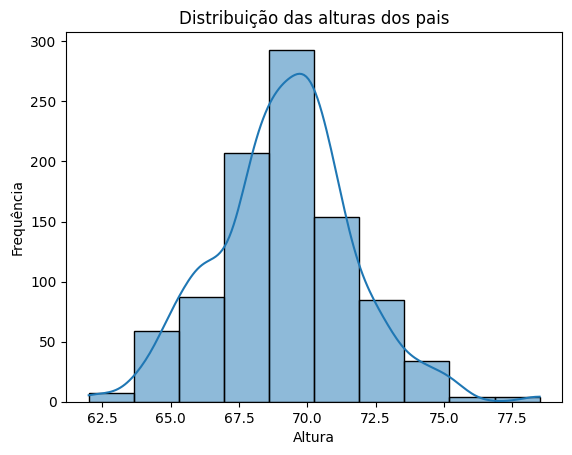

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['father'], bins=10, kde=True)

plt.title("Distribuição das alturas dos pais")
plt.xlabel("Altura")
plt.ylabel("Frequência")
plt.show()

In [72]:
from scipy.stats import gaussian_kde

data = df['father']

kde = gaussian_kde(df['father'])

x_vals = np.linspace(data.min(), data.max(), 1000)

In [73]:
cdf_vals = [kde.integrate_box_1d(-np.inf, x) for x in x_vals]

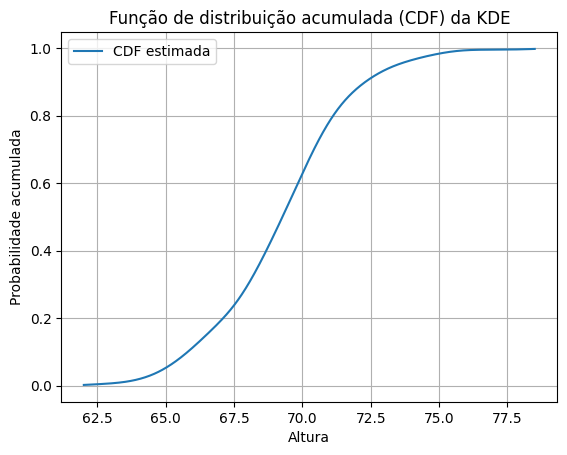

In [74]:
# Plot da CDF
plt.plot(x_vals, cdf_vals, label='CDF estimada')
plt.title("Função de distribuição acumulada (CDF) da KDE")
plt.xlabel("Altura")
plt.ylabel("Probabilidade acumulada")
plt.grid(True)
plt.legend()
plt.show()

In [75]:
inv_cdf = interp1d(cdf_vals, x_vals, bounds_error=False, fill_value=(x_vals[0], x_vals[-1]))

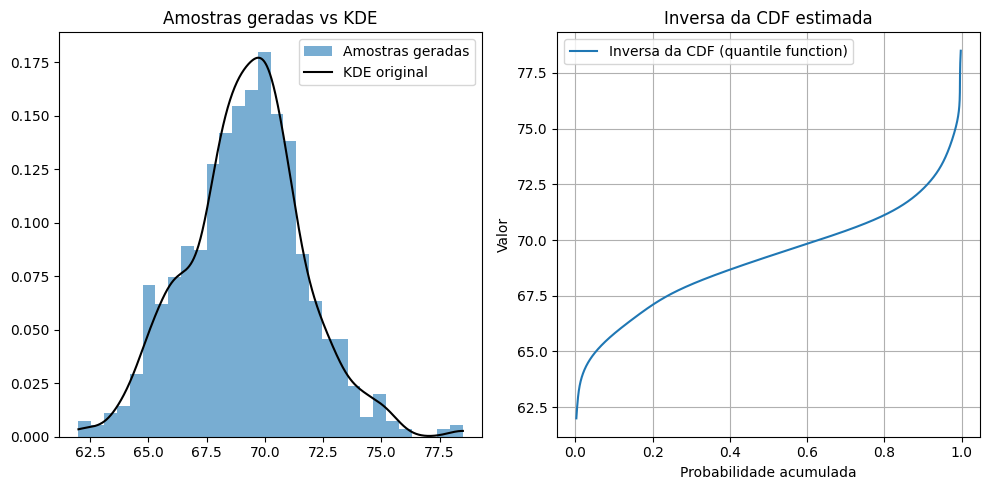

In [76]:
u = np.random.uniform(0, 1, size=1000)
samples = inv_cdf(u)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(samples, bins=30, density=True, alpha=0.6, label='Amostras geradas')
plt.plot(x_vals, kde(x_vals), label='KDE original', color='black')
plt.title("Amostras geradas vs KDE")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cdf_vals, x_vals, label='Inversa da CDF (quantile function)')
plt.xlabel('Probabilidade acumulada')
plt.ylabel('Valor')
plt.title("Inversa da CDF estimada")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [77]:
for pos in perdidos['posicao']:
    u = np.random.uniform(0, 1)
    perdidos['amostrado'].append(inv_cdf(u))

In [81]:
v_perdidos = np.array(perdidos['valor'])
v_amostrados = np.array(perdidos['amostrado'])
print("Média original dos perdidos:", np.mean(v_perdidos))
print("Média dos amostrados:       ", np.mean(v_amostrados))
print("Desvio padrão original:     ", np.std(v_perdidos))
print("Desvio padrão amostrado:    ", np.std(v_amostrados))

Média original dos perdidos: 69.76333333333334
Média dos amostrados:        68.79464517516696
Desvio padrão original:      2.2843647305590724
Desvio padrão amostrado:     2.9726329584131044
